In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url='https://vincentarelbundock.github.io/Rdatasets/csv/'
dataname='datasets/iris.csv'
iris=pd.read_csv(url+dataname)
#iris.head()


In [2]:
iris=iris.drop('Unnamed: 0',1)
iris.head()

C:\Users\Vinod Richard\AppData\Local\Temp\ipykernel_2432\3145876955.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  iris=iris.drop('Unnamed: 0',1)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratory Data Analysis

In [3]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()# checking for Null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [6]:
iris.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

# 2D Scatter Plot

C:\Users\Vinod Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


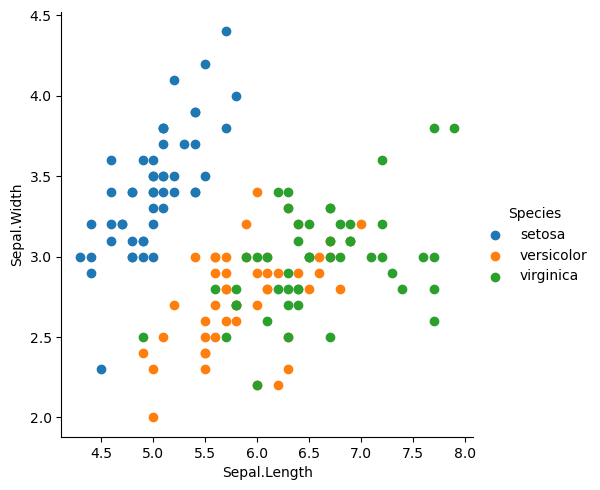

In [7]:
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,'Sepal.Length','Sepal.Width').add_legend()


# PreProcessing

In [12]:
#Feature Scaling

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report


X=iris.drop('Species',axis=1)
y=iris['Species']

# Changing the Species column to Numerical Values
y_le=LabelEncoder()
y=y_le.fit_transform(y)
iris['Species']=y



# Running k-means 

# Fitting the input data
kmean_cluster = KMeans(n_clusters=3)
model_value=kmean_cluster.fit(X)

# Predicting
preds=model_value.predict(X)

# Centroid values
centroids = kmean_cluster.cluster_centers_

target_names = ['setosa', 'versicolor','virginica']

print("Checking Clustering Accuracy\n\n")

print(classification_report(y ,kmean_cluster.labels_ ,target_names=target_names))




Checking Clustering Accuracy


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



# Elbow Method to find the optimal number of clusters in a dataset. 

C:\Users\Vinod Richard\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


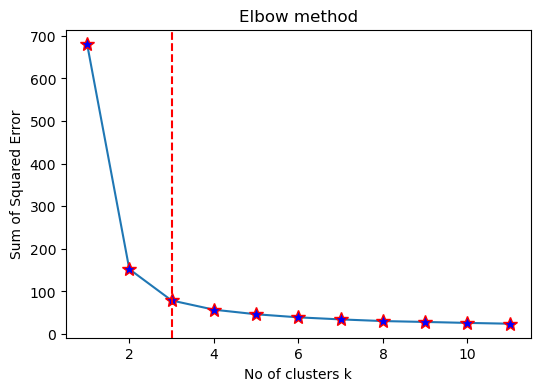

In [40]:
# range(1,15) represents no of clusters k
Error =[]
for i in range(1, 12):
    kmeans = KMeans(i).fit(X)
    Error.append(kmeans.inertia_)

fig,ax=plt.subplots(figsize=(6,4))
ax=plt.plot(range(1, 12), Error,marker='*',ms=10,mec='r',mfc='b')
plt.axvline(x=3, ls='--',color='red')
plt.title('Elbow method')
plt.xlabel('No of clusters k')
plt.ylabel('Sum of Squared Error')
plt.show()

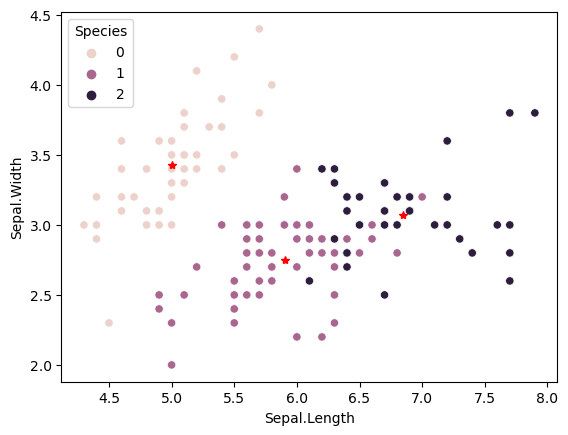

In [39]:
sns.scatterplot(data=X, x='Sepal.Length', y='Sepal.Width', hue=preds,legend='auto')
centers_x, centers_y = centroids[:,0], centroids[:,1]
plt.plot(centers_x, centers_y,'*',color='r')
plt.plot()
plt.legend(title="Species",loc='upper left')
plt.show()